In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(42)
num_samples = 100
num_features = 10
data = np.random.randn(num_samples, num_features)
columns = [f"Feature_{i+1}" for i in range(num_features)]
df = pd.DataFrame(data, columns=columns)
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040
...,...,...,...,...,...,...,...,...,...,...
95,-0.241236,0.352055,-1.251539,1.443765,-0.082151,1.117296,0.342725,0.456753,0.569767,0.447709
96,0.642723,1.329153,0.196521,0.709004,-0.089736,1.440117,-0.676392,1.800940,-0.040158,-1.430775
97,0.128104,-0.681052,0.840644,-0.652624,-0.446183,-1.889541,-0.452306,-2.423879,-1.583903,0.760415
98,0.785800,0.425458,-0.966976,-0.047711,-0.003603,-1.158365,1.503398,0.877362,-0.220964,0.026886


In [3]:
X=df.values

In [4]:
scaler=StandardScaler()
X=scaler.fit_transform(X)
n=int(input("Number of Clusters : "))
print(f"Clusters are : {n}")

Clusters are : 4


In [5]:
kmeans=KMeans(n_clusters=n, init="random", random_state=42)

In [6]:
kmeans.fit(X)

/home/el_professor258/.local/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(init='random', n_clusters=4, random_state=42)

In [7]:
df['Clusters']=kmeans.labels_

/tmp/ipykernel_11788/3891762058.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Feature_1'], cluster_data['Feature_2'], label=f'Cluster {cluster_label}', cmap='viridis')


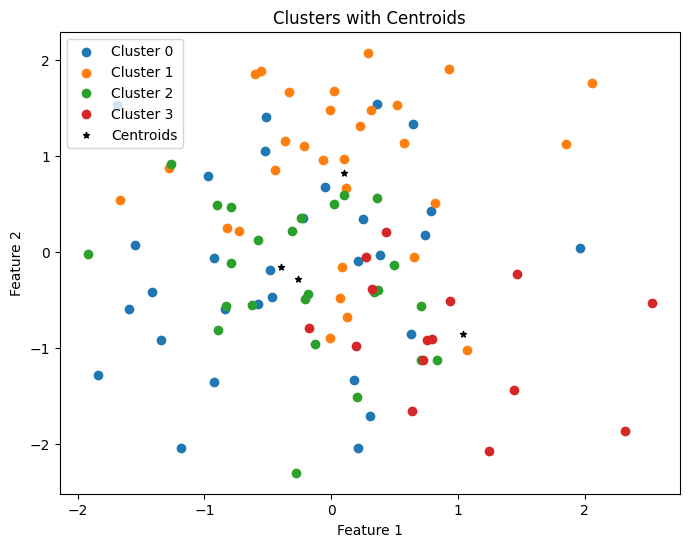

In [8]:
plt.figure(figsize=(8, 6))
for cluster_label in range(n):
    cluster_data = df[df['Clusters'] == cluster_label]
    plt.scatter(cluster_data['Feature_1'], cluster_data['Feature_2'], label=f'Cluster {cluster_label}', cmap='viridis')
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=20, c='black', label='Centroids')
plt.title('Clusters with Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

In [9]:
df

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Clusters
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,2
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,3
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,1
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0
...,...,...,...,...,...,...,...,...,...,...,...
95,-0.241236,0.352055,-1.251539,1.443765,-0.082151,1.117296,0.342725,0.456753,0.569767,0.447709,2
96,0.642723,1.329153,0.196521,0.709004,-0.089736,1.440117,-0.676392,1.800940,-0.040158,-1.430775,0
97,0.128104,-0.681052,0.840644,-0.652624,-0.446183,-1.889541,-0.452306,-2.423879,-1.583903,0.760415,1
98,0.785800,0.425458,-0.966976,-0.047711,-0.003603,-1.158365,1.503398,0.877362,-0.220964,0.026886,0


In [10]:
kmeans.cluster_centers_

array([[-0.39565447, -0.15661385, -0.43512582, -0.23213403, -0.45163792,
         0.30627917,  0.54914474,  0.37520948, -0.51887883, -0.49633658],
       [ 0.09763952,  0.81849932,  0.10987743, -0.35896567,  0.5890907 ,
        -0.40627661, -0.6099151 , -0.41770126, -0.10206656, -0.32781622],
       [-0.26408272, -0.28321033,  0.31293746,  1.07415635,  0.02223577,
        -0.4045103 ,  0.24053085,  0.18113888,  0.60494782,  0.77539719],
       [ 1.03616777, -0.85175371,  0.12893434, -0.60806119, -0.31196517,
         0.8741787 , -0.27934402, -0.21691457,  0.23364441,  0.35597694]])

In [11]:
df.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Clusters
0,0.496714,-0.138264,0.647689,1.523030,-0.234153,-0.234137,1.579213,0.767435,-0.469474,0.542560,2
1,-0.463418,-0.465730,0.241962,-1.913280,-1.724918,-0.562288,-1.012831,0.314247,-0.908024,-1.412304,0
2,1.465649,-0.225776,0.067528,-1.424748,-0.544383,0.110923,-1.150994,0.375698,-0.600639,-0.291694,3
3,-0.601707,1.852278,-0.013497,-1.057711,0.822545,-1.220844,0.208864,-1.959670,-1.328186,0.196861,1
4,0.738467,0.171368,-0.115648,-0.301104,-1.478522,-0.719844,-0.460639,1.057122,0.343618,-1.763040,0
